In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # Image Library in Python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir =tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

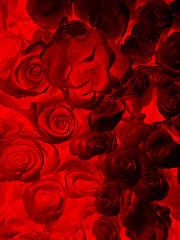

In [9]:
PIL.Image.open(str(roses[4]))

In [10]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}
    

In [11]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [12]:
img = cv2.imread(flowers_images_dict['roses'][0])

In [13]:
img.shape

(240, 179, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X,y = [],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img= cv2.resize(img,(180,180)) 
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X[0].shape

(180, 180, 3)

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [19]:
len(X_train)

2752

In [20]:
len(X_test)

918

In [21]:
X_train_scaled= X_train / 255

In [22]:
X_test_scaled = X_test / 255

In [23]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled , y_train , epochs=5)
    

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.3959 - loss: 1.4144
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.6200 - loss: 1.0008
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.6861 - loss: 0.8242
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.7727 - loss: 0.6407
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.8346 - loss: 0.4514


In [24]:
model.evaluate(X_test_scaled , y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6451 - loss: 1.0885


[1.0857970714569092, 0.6492374539375305]

In [25]:
predictions = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [26]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.9660458e-05, 9.9993098e-01, 1.6172731e-05, 8.9113894e-07,
       2.2373821e-05], dtype=float32)>

In [27]:
np.argmax(score)

1

In [28]:
y_test[0]

1

In [29]:
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.3),
])

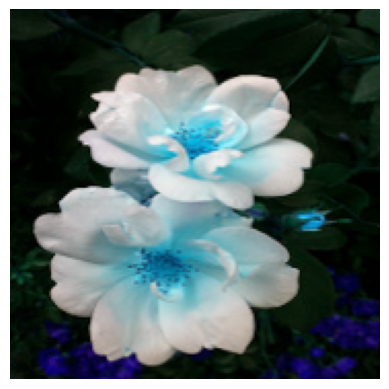

In [30]:
plt.axis('off')
plt.imshow(X[0])

In [31]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[1.46658093e-01, 3.96812654e+00, 0.00000000e+00],
        [0.00000000e+00, 2.04772711e+00, 4.77271043e-02],
        [0.00000000e+00, 2.87408710e+00, 8.74087214e-01],
        ...,
        [6.54655170e+00, 2.40627022e+01, 1.45255098e+01],
        [7.13081217e+00, 2.53316174e+01, 1.69045601e+01],
        [3.96069431e+00, 1.99213886e+01, 1.10361824e+01]],

       [[0.00000000e+00, 4.23663139e+00, 0.00000000e+00],
        [0.00000000e+00, 4.11282396e+00, 0.00000000e+00],
        [0.00000000e+00, 4.72239256e+00, 2.77607322e-01],
        ...,
        [6.75952148e+00, 2.42737446e+01, 1.18172512e+01],
        [6.35534859e+00, 2.61777020e+01, 1.32938833e+01],
        [4.63257170e+00, 2.11239719e+01, 9.26514339e+00]],

       [[1.12630570e+00, 5.71537495e+00, 1.07368684e+00],
        [5.89462280e-01, 5.01712370e+00, 8.49945784e-01],
        [6.76328719e-01, 5.29473114e+00, 2.94731140e-01],
        ...,
        [1.52999191e+01, 3.15077

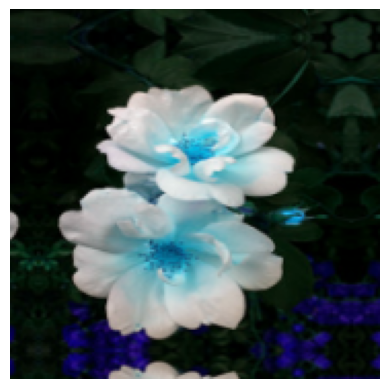

In [32]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [33]:
data_augmentation_1 = keras.Sequential([
    layers.RandomContrast(0.9),
])

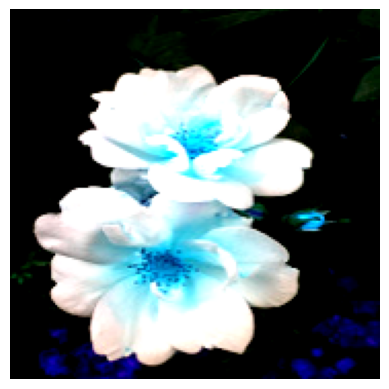

In [34]:
plt.axis('off')
plt.imshow(data_augmentation_1(X)[0].numpy().astype('uint8'))

In [42]:
data_augmentation_2 = keras.Sequential([
    layers.RandomRotation(0.99),
])

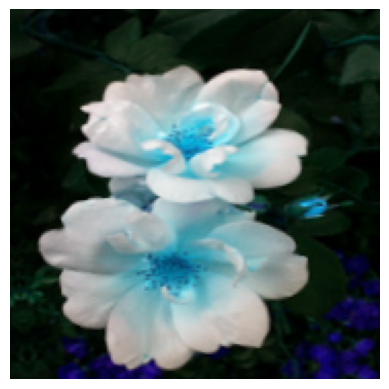

In [43]:
plt.axis('off')
plt.imshow(data_augmentation_2(X)[0].numpy().astype('uint8'))